In [1]:
import sys
sys.path.append('.')
sys.path.append('..')

from subreddit_frequency import load_dataframe_from_jsonl
from tqdm import tqdm
tqdm.pandas()

import seaborn as sns
from datetime import datetime
sns.set('paper')

from ipywidgets import interact
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
submissions_df = pd.concat([
    load_dataframe_from_jsonl(a)
    for a in (Path.home() / "Documents" / "leddit" / "data").glob("RC_*.jsonl")
],axis=0)

79380it [00:00, 377842.71it/s]

/home/johnkeszler/Documents/leddit/data/RC_2019_02.jsonl


120645639it [04:38, 433834.76it/s]
0it [00:00, ?it/s]

/home/johnkeszler/Documents/leddit/data/RC_2019-02.jsonl


In [3]:
submissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120645639 entries, 0 to 120645638
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   author     object
 1   subreddit  object
dtypes: object(2)
memory usage: 1.8+ GB


In [15]:
submissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120645639 entries, 0 to 120645638
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   author     object
 1   subreddit  object
dtypes: object(2)
memory usage: 1.8+ GB


In [26]:
groupbydf = submissions_df.groupby(['author','subreddit']).author.count()

In [37]:
print(len(groupbydf))
groupbydfframe = groupbydf.to_frame()
groupbydfframe.to_pickle("./groupbydf.pkl")

25749606


In [38]:
unpickled_df =  pd.read_pickle("./groupbydf.pkl")

In [50]:
from collections import defaultdict
author2subs = defaultdict(set)
sub2authors = defaultdict(set)

for index, row in groupbydfframe.iterrows():
    #print(index)
    #print(row)
    author2subs[index[0]].add(index[1])
    sub2authors[index[1]].add(index[0])

In [62]:
print((sub2authors['The_Donald']))

{'prettyfamousguy', 'Save_The_Memes2018', 'Thanos796', 'throwawaymd123', 'putoffencivenamehere', 'SpindleTwist', 'PearlSquared', 'MO_is_a_tranny', 'gabrielmodesta', 'Glock_Socks', 'ihatepizzanow', 'Publix_CT', 'DLDG', 'Comrade_Comski', 'GANiggy', 'm3Me_Magic', 'Patcrusoe', 'henricky', 'BigYellowLemon', 'BubblegumNuts', 'bulldowzer', 'facts_dont_care', 'FAK3-News', 'RapidRoastingHam', 'r34ct', 'trumpteen56', 'thermidor94', 'arcticbear1', 'Keepitclassy2day', 'SpartasVHT', 'reblerts', 'ecctt2000', 'Marie-Jacqueline', 'kennys_logins', 'ruralife', 'saturdaytruthwarrior', 'wayfarin', 'LongandLanky', 'hardcorerecondo', 'TheFauxcahontas', 'fthecoup', 'PTFXDargo', 'zaberfang404', 'TheWindows9', 'ksiazek7', 'plsbemyfriend24', 'rockit2guns', 'xlaziox', 'nm645908', '420Momm', 'validoman', 'Klabzder', 'dudududududududuel', 'Lokfuhrer', 'donovandec', 'Agreeable_Hamster', 'Moski147', 'AzureDude', 'Mrdifi', 'antcab22', 'tutoredzeus', 'WarGreymon77', 'Teh_Justin13', 'JortZealot', 'barrysoweto', 'ViperB

In [55]:
import pickle
with open('sub2authors.pickle.pkl','wb') as handle:
    pickle.dump(sub2authors,handle)

In [56]:
import pickle
with open('author2subs.pickle.pkl','wb') as handle:
    pickle.dump(author2subs,handle)#,"./groupbydf.pkl")

In [79]:
subs = ['Conservative','neoliberal','tuesday','Republican','Libertarian','SocialConservative']

maximum = sorted(author2subs,key= lambda k: len(author2subs[k]),reverse=True)[:100] #max(sub2authors, key=lambda k: len(sub2authors[k]))

In [80]:
print(maximum)



['[deleted]', 'CakeDay--Bot', 'TotesMessenger', 'imguralbumbot', 'AutoModerator', 'agree-with-you', 'CommonMisspellingBot', 'sneakpeekbot', 'ClickableLinkBot', 'WikiTextBot', 'gifv-bot', 'Alec935', 'BooCMB', 'RemindMeBot', 'BooBCMB', 'anti-gif-bot', 'icarebot', 'phonebatterylevelbot', 'HelperBot_', 'FortniteIsCancerBot', 'MaxImageBot', 'PORTMANTEAU-BOT', 'Bot_Metric', 'B0tRank', 'AreYouDeaf', 'timezone_bot', 'AutoRedditPython', 'LimbRetrieval-Bot', 'ackchyually_bot', 'ugh_bot', 'auto-xkcd37', 'HappyFriendlyBot', 'twitterlinkbot', 'quietidiot', 'BigLebowskiBot', 'BananaFactBot', 'RedditCancerBot420', 'EncouragementRobot', 'multiplevideosbot', 'amp-is-watching-you', 'vreddit_bot', 'SmallSubBot', 'dadjokes_bot', 'YOUREABOT', 'table_it_bot', 'nelska', 'botrickbateman', 'autotldr', 'stabbot', '413DX', 'RepliesNice', 'drift_summary', 'Title2ImageBot', 'GifReversingBot', 'jokerkat', 'UrADoucheIfYouWoosh', 'Songbird420', 'niggerfaggotkikespic', 'theHelperdroid', 'LyrEcho', 'only5cents', 'jafis

In [91]:
subs = ['Conservative','neoliberal','tuesday','Republican','Libertarian','SocialConservative','prolife','progun']
conservatives = set()
for key in subs:
    conservatives = conservatives.union(sub2authors[key])

In [92]:
print(len(conservatives))

35214


In [181]:
subs = ['Conservative','neoliberal','tuesday',
        'Republican','Libertarian','SocialConservative',
        'prolife','progun','libnat','Anarcho_Capitalism','ronpaul',
        'ProtectAndServe','shitguncontrollerssay','hottiesfortrump',
        'HillaryForPrison','LouderWithCrowder','dontwalkrun_youtube',
       'EnoughCommieSpam','ThereAreOnly2Genders','benshapiro','ShitLiberalsSay']
subs_nogun = ['Conservative','neoliberal','tuesday',
        'Republican','Libertarian','SocialConservative',
        'prolife','libnat','Anarcho_Capitalism',
        'ProtectAndServe','shitguncontrollerssay',
        'HillaryForPrison','LouderWithCrowder',
       'EnoughCommieSpam','ThereAreOnly2Genders','benshapiro','ShitLiberalsSay']
pro_gun = ['progun','ronpaul','hottiesfortrump']


conservatives = list()
for key in subs:
    conservatives += (list(sub2authors[key]))
    

    
conservatives_nogun = list()
for key in subs_nogun:
    conservatives_nogun += (list(sub2authors[key]))
    
conservatives_gun = list()
for key in pro_gun:
    conservatives_gun += (list(sub2authors[key]))
    
    
libsubs = ['Liberal','SandersForPresident','communism101','Socialism_101']

liberals = list()
for key in libsubs:
    liberals += (list(sub2authors[key]))

In [182]:
print(len(author2subs))
print(len(conservatives))
print(len(conservatives_nogun))
print(len(conservatives_gun))

print(len(liberals))

with open('conservatives.pkl','wb') as handle:
    pickle.dump(conservatives,handle)#,"./groupbydf.pkl")

5982376
51983
47609
4316
14500


In [144]:
from collections import Counter

#Counter(conservatives).most_common(10)
Counter(liberals).most_common(10)

[('[deleted]', 4),
 ('heyprestorevolution', 3),
 ('Alec935', 3),
 ('callofcutie', 3),
 ('AutoModerator', 3),
 ('Rvb321', 3),
 ('RemindMeBot', 3),
 ('And-R-Pov', 3),
 ('u-not-gang', 3),
 ('adamd22', 3)]

In [146]:
(author2subs['Alec935'])
#(author2subs['cons_NC'])

{'teenagersnew',
 'vegetarian',
 'MMFB',
 'Columbus',
 'GalaxyS8',
 'EnoughTrumpSpam',
 'civ',
 'The_Wall',
 'askdrugs',
 'idlechampions',
 'AnimalsBeingJerks',
 '5ToubunNoHanayome',
 'hotsauce',
 'dogs',
 'MAFS_TV',
 'temptationislandUSA',
 'GolfGTI',
 'WhiteWolfRPG',
 'javvy',
 'ainbow',
 'BeautyBoxes',
 'NewPatriotism',
 'bindingofisaac',
 'TibiaMMO',
 'bleach',
 'TechNewsToday',
 'DivinityOriginalSin',
 'Brompton',
 'Metal',
 'Wellington',
 'yaoi',
 'intermittentfasting',
 'VictoriaBC',
 'EroticLuxury',
 'WatchURaffle',
 'Pomade',
 'adultery',
 'progresspics',
 'Dashcam',
 'BeardedDragons',
 'ForeverAloneDating',
 'OverwatchUniversity',
 'pussypassdenied',
 'ACPocketCamp',
 'ImABlue',
 'guineapigs',
 'gatekeeping',
 'torties',
 'AfterTheEndFanFork',
 'Madden',
 'kingdomcome',
 'GuiltyPleasureMusic',
 'acne',
 'simracing',
 'suspiciousquotes',
 'crafts',
 'findaleague',
 'yesyesyesyesno',
 'onejob',
 'asoiaf',
 'BuyItForLife',
 'bipolar',
 'theticket',
 'Rcbestsell',
 'solotravel',


In [200]:
testdf = pd.read_pickle('../data/aita-test.pkl')

In [201]:
print(len(testdf))
conservatives_nogun = set(conservatives_nogun)

3070


In [202]:
testdf['is_conservative'] = testdf['author'].map(lambda x: x in conservatives_nogun)

In [203]:
testdf['is_conservative'].mean()

0.23127035830618892

[]

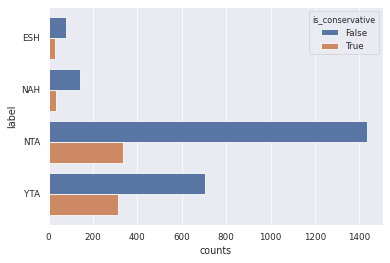

In [204]:


label_counts = testdf.groupby(['label','is_conservative'])[['selftext']].count()
label_counts.columns = ['counts']
label_counts = label_counts.reset_index()
sns.barplot(y='label', x='counts', data=label_counts,hue = 'is_conservative')
plt.plot()

In [205]:
with open('../data/aita-test-conservative.pkl','wb') as handle:
    pickle.dump(testdf,handle)